# <p style="padding:10px;background-color:#E7B10A;margin:0;color:#141E46;font-family:newtimeroman;font-size:150%;text-align:center;border-radius: 10px 20px;overflow:hidden;font-weight:500">BMCS2123 Natural Language Processing Assignment</p>

# <p style="padding:10px;background-color:#EFB495;margin:0;color:#213555;font-family:newtimeroman;font-size:120%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Natural Language Processing for Sentiment Analysis : Unveiling Customer Voices of Shopee Reviews and Comments</p>

<p style="text-align:center; ">
<img src="https://bigblue.academy/images/image/blog/sentiment-analysis/group-153.jpg" style='width: 600px; height: 350px;'>
</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import Libraries & Packages</p>

In [1]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install PySastrawi

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install Langdetect

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install demoji

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install Sastrawi

     -------------------------------------- 209.7/209.7 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install googletrans

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install spacy

     -------------------------------------- 57.0/57.0 kB 995.9 kB/s eta 0:00:00
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.0.4
    Uninstalling smart-open-7.0.4:
      Successfully uninstalled smart-open-7.0.4
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import string
import demoji
import contractions
import re
import tkinter as tk
import joblib
import numpy as np
import emoji
import spacy

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from googletrans import Translator
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from tkinter import ttk

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kenne\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Import The Dataset</p>

In [15]:
# https://shopee.com.my/wakakagiftshop
# https://shopee.com.my/-READY-STOCK-BAJU-MELAYU-SLIM-FIT-DEWASA-DAN-BUDAK-(kain-sating)-RAYA-2024-i.310588344.24263963059?sp_atk=287c391c-faaa-41a1-82f2-7256758aae1e&xptdk=287c391c-faaa-41a1-82f2-7256758aae1e
# https://shopee.com.my/SALE-!!!!Baju-Melayu-Slimfit-dan-Regular-Warna-Cream-i.45909008.4503941744?sp_atk=8aaff726-92bd-4a36-a751-26b59408ed33&xptdk=8aaff726-92bd-4a36-a751-26b59408ed33

# Define dataset file paths
data  = "dataset1.csv"
data2 = "dataset2.csv"

# Read CSV files into DataFrames
df1 = pd.read_csv(data)
df2 = pd.read_csv(data2, encoding='latin1')

# Merge the 2 dataset
combined_df = pd.concat([df1, df2], ignore_index=True)

# Save the merge dataset as csv file
combined_df.to_csv("merged_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Overview</p>

In [16]:
# Show the daatset description
combined_df.describe()

,No.,Rating
count,466.000000,466.000000
mean,217.532189,3.343348
std,133.931229,1.471642
min,1.000000,1.000000
25%,101.250000,2.000000
50%,217.500000,3.000000
75%,333.750000,5.000000
max,450.000000,5.000000


In [17]:
# Print the data from head
combined_df.head()

,No.,Author,Rating,Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


In [18]:
# Print the data from head
combined_df.tail() 

,No.,Author,Rating,Review
461,12,m*****4,1,Warna nude kita mintak warna lain yg Smpai lpa...
462,13,khaynurul,5,NaN
463,14,k_w1z356vg,5,tidak mengikuti saiz yg saya nak
464,15,acikmaira,1,Ukuran tak sama saiz besar
465,16,fvxmwlvyq7,5,NaN


In [19]:
# Print the dataset information
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No.     466 non-null    int64 
 1   Author  466 non-null    object
 2   Rating  466 non-null    int64 
 3   Review  462 non-null    object
dtypes: int64(2), object(2)
memory usage: 14.7+ KB


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Preprocessing</p>

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Column Transformation</p>

In [20]:
# Print out the dataset columns
combined_df.columns

Index(['No.', 'Author', 'Rating', 'Review'], dtype='object')

In [21]:
# Transform the columns name for easy to understand the attributes meaning
combined_df.columns = ['No','Author','Product Rating','Product Review']

In [22]:
# Print out he data from head to confirm columns transform successfully
combined_df.head()

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Cleaning</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Handling Missing Value</p>

In [23]:
# Check have any missing value or not
combined_df.isnull().any().any()

True

In [24]:
# Show out which attribute have missing value
combined_df.isna().any()

No                False
Author            False
Product Rating    False
Product Review     True
dtype: bool


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Remove Missing Value</p>

In [25]:
# Remove missing values
combined_df = combined_df.dropna(subset=['Product Review'])

In [26]:
# Verify whether missing values removed?
missing_values = combined_df.isnull()

missing_count_per_column = missing_values.sum()

print("Missing values per column:")
print(missing_count_per_column)

if missing_values.any().any():
    print("\nThere are missing values in the data.")
else:
    print("\nThere are no missing values in the data.")


Missing values per column:
No                0
Author            0
Product Rating    0
Product Review    0
dtype: int64

There are no missing values in the data.


In [27]:
# Save the cleaned dataset
combined_df.to_csv('clean_dataset.csv', index=False)

In [28]:
# Double check missing value
combined_df.isnull().any().any() 

False


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Word Cloud</p>

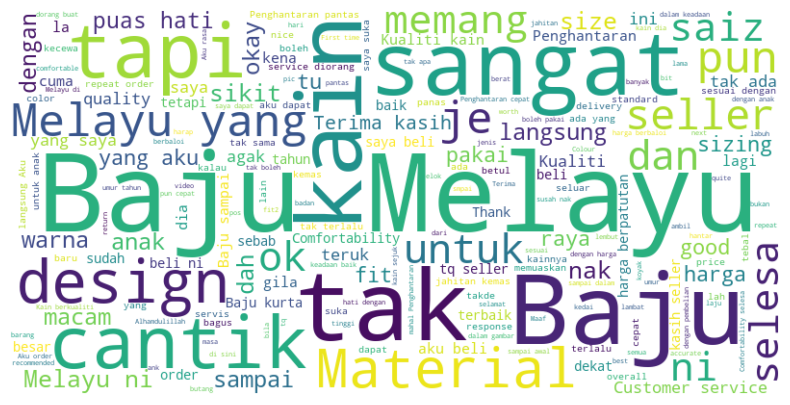

In [29]:
# Generate the word cloud
def clean_review(review):
  if not isinstance(review, str):
    return str(review)  # Convert float to string
  else:
    return review

cleaned_reviews = [clean_review(review) for review in combined_df['Product Review']]
reviews_text = ' '.join(cleaned_reviews)

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
combined_df

,No,Author,Product Rating,Product Review
0,1,n*****n,3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,2,y*****i,2,"Sizing tak accurate langsung, aku rasa macam b..."
2,3,amalinadinee,2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,4,c*****8,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,5,8kbvdmoyw9,5,Baju selamat mendarat kain cantik dan sedap di...
...,...,...,...,...
458,9,s*****a,3,Pada baju ada warna merah\nCuba basuh masih x ...
460,11,*****n,2,Colour a bit different from the picture. And m...
461,12,m*****4,1,Warna nude kita mintak warna lain yg Smpai lpa...
463,14,k_w1z356vg,5,tidak mengikuti saiz yg saya nak


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">EDA</p>

In [31]:
# Create a new DataFrame with only the desired columns
selected_columns = ['Product Review','Product Rating']
combined_df = combined_df[selected_columns]

# Display the updated DataFrame
combined_df.head()

,Product Review,Product Rating
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3
1,"Sizing tak accurate langsung, aku rasa macam b...",2
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5
4,Baju selamat mendarat kain cantik dan sedap di...,5



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Demoji</p>

In [32]:
# Demoji
def convert_demojis(text):
    text_temp = emoji.demojize(text)
    return text_temp.replace(":", " ")

# Apply the demoji function to the 'Product Review' column of your DataFrame
combined_df['demojiReview'] = combined_df['Product Review'].apply(convert_demojis)

# Display the updated DataFrame
combined_df.head()

,Product Review,Product Rating,demojiReview
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak..."
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"Sizing tak accurate langsung, aku rasa macam b..."
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"Baju kurta aku dah koyak sebelum pakai, memang..."
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,Delivery laju. Kain cantik. Thanks seller. Mas...
4,Baju selamat mendarat kain cantik dan sedap di...,5,Baju selamat mendarat kain cantik dan sedap di...



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Remove Punctuation</p>

In [33]:
# Remove punctuation review
def remove_punctuation(text):
    punctuation_pattern = r'[^\w\s]'
    text_without_punctuation = (re.sub(punctuation_pattern, ' ', text)).lower()
    
    cleaned_text_temp = text_without_punctuation.replace('\n', ' ')
    
    punctuation_chars = '''!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~'''
    cleaned_text = ''.join(char for char in cleaned_text_temp if char not in punctuation_chars)
    return cleaned_text

# Apply the remove_punctuation function to the 'demojiReview' column of your DataFrame
combined_df['removePunc_text'] = combined_df['demojiReview'].apply(remove_punctuation)

# Display the updated DataFrame
combined_df.head()

,Product Review,Product Rating,demojiReview,removePunc_text
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"Sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam b...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"Baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju kain cantik thanks seller mas...
4,Baju selamat mendarat kain cantik dan sedap di...,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Contraction</p>

In [34]:
contractions.add('x','tidak')
contractions.add('tak','tidak')

def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'Review_Lcase' column
combined_df['contrated_text'] = combined_df['removePunc_text'].apply(expand_contractions)

# Display the updated DataFrame
combined_df.head()

,Product Review,Product Rating,demojiReview,removePunc_text,contrated_text
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak...,baju kurta sampai dalam keadaan baik tapi tid...
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"Sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam b...,sizing tidak accurate langsung aku rasa macam...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"Baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang...,baju kurta aku dah koyak sebelum pakai memang...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju kain cantik thanks seller mas...,delivery laju kain cantik thanks seller mas...
4,Baju selamat mendarat kain cantik dan sedap di...,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Translator</p>

In [35]:
# Function to translate text
def translate_text(text, source_lang='en', target_lang='ms'):
    try:
        # Initialize the translator
        translator = Translator()

        # Translate text
        translation = translator.translate(text, src=source_lang, dest=target_lang)

        return translation.text
    except Exception as e:
        return str(e)

        
# Translate text in a specific column (e.g., 'demojiReview') and store the translations in a new column
combined_df['translated_text_ms'] = combined_df['contrated_text'].apply(translate_text)

# Display the translated text
combined_df['translated_text_ms'].head()


0    Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1    SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2    Baju kurta aku dah koyak Sebelum pakai memang ...
3    Penghantaran Laju Kain Cantik Terima kasih Pen...
4    Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
Name: translated_text_ms, dtype: object

In [36]:
# Function to translate text
def translate_text(text, source_lang='ms', target_lang='en'):
    try:
        # Initialize the translator
        translator = Translator()

        # Translate text
        translation = translator.translate(text, src=source_lang, dest=target_lang)

        return translation.text
    except Exception as e:
        return str(e)

        
# Translate text in a specific column and store the translations in a new column
combined_df['translated_text_en'] = combined_df['translated_text_ms'].apply(translate_text)

# Display the translated text
combined_df.head()

,Product Review,Product Rating,demojiReview,removePunc_text,contrated_text,translated_text_ms,translated_text_en
0,"baju kurta sampai dalam keadaan baik, tapi tak...",3,"baju kurta sampai dalam keadaan baik, tapi tak...",baju kurta sampai dalam keadaan baik tapi tak...,baju kurta sampai dalam keadaan baik tapi tid...,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Kurta shirts are in good condition but pull there
1,"Sizing tak accurate langsung, aku rasa macam b...",2,"Sizing tak accurate langsung, aku rasa macam b...",sizing tak accurate langsung aku rasa macam b...,sizing tidak accurate langsung aku rasa macam...,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,The right sizing is right I feel like a high s...
2,"Baju kurta aku dah koyak sebelum pakai, memang...",2,"Baju kurta aku dah koyak sebelum pakai, memang...",baju kurta aku dah koyak sebelum pakai memang...,baju kurta aku dah koyak sebelum pakai memang...,Baju kurta aku dah koyak Sebelum pakai memang ...,Kurta shirt I was torn before wearing the dire...
3,Delivery laju. Kain cantik. Thanks seller. Mas...,5,Delivery laju. Kain cantik. Thanks seller. Mas...,delivery laju kain cantik thanks seller mas...,delivery laju kain cantik thanks seller mas...,Penghantaran Laju Kain Cantik Terima kasih Pen...,Beautiful fabric delivery Thank you Seller is ...
4,Baju selamat mendarat kain cantik dan sedap di...,5,Baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,baju selamat mendarat kain cantik dan sedap di...,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Safe clothes landed beautiful and tasty fabric...


In [37]:
# Selecting specific columns for output file 1
selected_col_1 = ['translated_text_ms', 'Product Rating']
output_df_1 = combined_df[selected_col_1]

# Store the selected columns to another CSV file
output_df_1.to_csv('translated_output_ms.csv', index=False)


# Selecting specific columns for output file 2
selected_col_2 = ['translated_text_en', 'Product Rating']
output_df_2 = combined_df[selected_col_2]

# Store the selected columns to another CSV file
output_df_2.to_csv('translated_output_en.csv', index=False)

# Read the CSV files
translated_output_1 = pd.read_csv('translated_output_ms.csv')
translated_output_2 = pd.read_csv('translated_output_en.csv')

translated_output_1.columns = ['translated_text','Product Review']
translated_output_2.columns = ['translated_text','Product Review']

# Merge the CSV files on the common column 'Product Rating'
union_df = pd.concat([translated_output_1, translated_output_2])

# Store the merged DataFrame to a new CSV file
union_df.to_csv('translated_dataset.csv', index=False)

In [38]:
combined_df = pd.read_csv('translated_dataset.csv')

In [39]:
combined_df.columns

Index(['translated_text', 'Product Review'], dtype='object')

In [40]:
combined_df

,translated_text,Product Review
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,3
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,2
2,Baju kurta aku dah koyak Sebelum pakai memang ...,2
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,5
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,5
...,...,...
919,On the shirt there is a red tried to wash still,3
920,The color is slightly different from the pictu...,2
921,Nude color we ask for another color that forge...,1
922,Reject following the size I want,5



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Remove Stopwords</p>

In [41]:
# Define a function to remove stopwords
def remove_stopwords(text):
    # Tokenize the text
    text = str(text)
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_removed = [word for word in tokens if word.lower() not in stopwords.words('english')]
    # Join the words back into a single string
    return ' '.join(stopwords_removed)

# Apply the remove_stopwords function
combined_df['stopword_text'] = combined_df['translated_text'].apply(remove_stopwords)

combined_df['stopword_text']

0      Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1      SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2      Baju kurta aku dah koyak Sebelum pakai memang ...
3      Penghantaran Laju Kain Cantik Terima kasih Pen...
4      Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
                             ...                        
919                           shirt red tried wash still
920         color slightly different picture size modern
921    Nude color ask another color forgets button fr...
922                           Reject following size want
923                                       size pull size
Name: stopword_text, Length: 924, dtype: object


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Tokenisation</p>

In [42]:
# Tokenisation
from nltk.tokenize import word_tokenize

def word_tokenize_wrapper(text):
    text = str(text)
    return word_tokenize(text)

combined_df['tokenised_text'] = combined_df['translated_text'].apply(word_tokenize_wrapper)

combined_df.head()

,translated_text,Product Review,stopword_text,tokenised_text
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,3,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,"[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta..."
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,2,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,"[SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma..."
2,Baju kurta aku dah koyak Sebelum pakai memang ...,2,Baju kurta aku dah koyak Sebelum pakai memang ...,"[Baju, kurta, aku, dah, koyak, Sebelum, pakai,..."
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,5,Penghantaran Laju Kain Cantik Terima kasih Pen...,"[Penghantaran, Laju, Kain, Cantik, Terima, kas..."
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,5,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,"[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S..."



# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Normalisation</p>

In [43]:
# Normalisation
normalized_word = pd.read_csv("normalisasi.csv")
normalized_word_dict = {}

for index, row in normalized_word.iterrows():
    if row[0] not in normalized_word_dict:
        normalized_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalized_word_dict[term] if term in normalized_word_dict else term for term in document]

combined_df['normalise_text'] = combined_df['tokenised_text'].apply(normalized_term)
combined_df['normalise_text'].head()

0    [Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...
1    [SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...
2    [Baju, kurta, saya, dah, koyak, Sebelum, pakai...
3    [Penghantaran, Laju, Kain, Cantik, Terima, kas...
4    [Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...
Name: normalise_text, dtype: object


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Data Steming</p>

In [44]:
# Data stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    do = []
    for w in text:
        dt = stemmer.stem(w)
        do.append(dt)
    d_clean=[]
    d_clean=" ".join(do)
    print(d_clean)
    return d_clean

combined_df['stemming_text'] = combined_df['normalise_text'].apply(stemming)

combined_df['stemming_text']

baju kurta sampai dalam ada baik tapi tarik ada
sizing tinda tepat langsung aku rasa macam baju sekolah zaman rendah expressionflessface
baju kurta saya dah koyak belum pakai memang tolak alit langsung facewithrollingeyes
hantar laju kain cantik terima kasih jual masih tunggu lagi 2pasan baju untuk smpai pos out lambat pulak dari yang ini
baju selamat darat kain cantik dan sedap di pakai jual amah abg j t pun laju buat keja
baju cantik pos dalam 4hri alit okay la terima kasih jual zanyface zanyface zanyface zanyface
selamat sampai terima kasih ya saiz ukur sama seperti dalam carta ukur
bungkus bagus dan baik barang sampai dengan selamat tiada kerosakan dan bocor plastik yang di balut video tiada kait kain baik dan lembut
baju saiz 3 4 ok semua cantik jahit kemis baju saiz 1 2 jahit kemas tapi ada sikit kotor karat bela baju skrg
perfect hantar sangat cepat alit kain pun best aak 1 tahun 11 bulan amik saiz 1 2 fit jual responden pun cepat
bahan baik barang sampai dalam ada baik jual pun

0        baju kurta sampai dalam ada baik tapi tarik ada
1      sizing tinda tepat langsung aku rasa macam baj...
2      baju kurta saya dah koyak belum pakai memang t...
3      hantar laju kain cantik terima kasih jual masi...
4      baju selamat darat kain cantik dan sedap di pa...
                             ...                        
919     ons the shirt there is a red tried to wash still
920    the color is slightly different from the pictu...
921    nude color we ask for another color that forge...
922                     reject following the size i want
923                the size of the pull is the same size
Name: stemming_text, Length: 924, dtype: object

harga patut untuk alit yang beri reka bentuk tongkat lalu colok
baju melayu yang saya beli okay tapi boleh tingkat sikit pada alit kain
saya suka hantar yang pantas baju melayu pun standard je
kain baju melayu ni selesa tapi reka bentuk agak biasa tidak terlalu terlalu
saiz okay tetapi saya harap ada lebih banyak pilih reka bentuk yang tarik
baju melayu ni okay untuk guna sederhana je
harga berbaloi dengan alit baju melayu yang saya dapat
saya puas hati dengan beli baju melayu ni tongk terlalu mewah tapi okay
baju melayu yang saya beli okay tapi takdelah terlalu berbeza dari yang lain
standard je lah baju melayu ni tongk ada terlalu colok
baju melayu yang aku beli ni okay je lah material kain dia macam lapik meja plastik tapi harga patut
khidmat langgan orang memang hampeh takde keje langsung tapi hantar cepat
baju melayu sampai lambat gila reka bentuk pun tongk sama macam dalam gambar keliru
alit kain macam kain pasar malam tolak padan dengan harga tinggi
sizing tinda tepat langsung a

selesa bahan yang sangat baik sangat baik beli melayu ni untuk adik saya dan dia suka begitu banyak saiz juga baik dan kain adalah warna yang baik di sini rana cahaya tetapi warna dalam hidup benar dengan cahaya yang baik dekat dengan dekatgambar promo akan beli lagi dengan jual ini pada masa depan ahaha terima kasih tuhan ia tiba belum minggu depan raya loudlycryingface rollingonthefloorlaughing rollingonthefloorlaughing
terima kasih jual barang sampai dengan safe walaupun lewat sangat tapi puas hati kain baju bagus dan cantik sesuai lah utk anak pakii raya ni nanti maaf picture dan video
bahan warna cantik kain selesa saiz potong sesuai utuk kana kanak 1 tahun 3 bulan maaf gambar tiada kait
selesa jahit kemas harga murahh bahan nice sesuai dengan harga cara seluruh puja jual tq redheart aak 3 tahun 6 bulan
bahan moss crepe comfortability terpaak selesa anak umur 3 tahun berat 15kg baju selesa suami i yang cerewet bab bahan baju puji bahan baju ini banding besar dekat kenal luar tenda

the shirt of the size of the stick is slow to deliver the goods close to 10 days until the plk is dirty so bad the money i lost this money
items received in good condition ok quality is acceptable as the size of the price range 8 suits my 8 -year -old nephew but i think taking size 1 is larger as he has a relatively high shipping response from the seller to the courier a bit slow
the fast delivery of the wedge is appropriate to fit the size of the long hand very long to fix the whole whole all satisfying the good wing special buttons the sumus remove the afternoon after the afternoon after the removal after the afternoon after removing the afternoonafter the afternoon after the removal after removing after removing after removing after removing after removing after removing after removing after removing after removing
beautiful clothes and fabrics can be faced facewithtearsofjoy
shirts with my sister 6 years old next year can tidak longer wear facewithtearsofjoy facewithtearsofjoy
qual

comfortable shirts material helok pic pic has nothing to do with beautiful clothes so much fabric suits aak2 big pants like a little terima kasih seller i like
the shirt has been satisfied with the same quality as the best quality child
soft comfortable material comfortable delivery fit size with children and husband
the kid s shirt is already the size of the size of the cloth 
the clothes are so beautiful to love the size of 8 fit with the age of 7 years old terima kasih the beautiful color seller this year is worth the price of lying on another store can be repeated again later
good comfort thumbsuplightskintone good material thumbsuplightskintone years -last year ever bought and now -2nd buy good hand
comfortable size the exact materials of beautiful clothes and fast delivery of children love
the comfort of this green dusty is a little bit to go to gray color and long but ok the citrus delivery is fast happy holidays sorry zahir inner thank you
thick stitches of thick fabric hope yo

this is really bad in size to get rid of cheap fabrics bad service cheating sticks to buy more
slow delivery of bad quality shirts are severely minimized according to bad prices
tink s shirt to the size of the price of the expensive price of customer service can be hoped
bad service service comfortable comfortable tongue price western fraudsters are very disappointed
the design of the beautiful sticks is a very bad quality of the expensive price of delivery very slowly
similar tongka shirts in pictures poor quality price very more service very bad
the size of a stick of a bad service is not worth the service
tink s order to the shirt of crazy expensive service management do not buy here
the malay shirt looks stylish but the quality of the fabric disappoints the delivery is timely but not worth the price
the design is nice but its size is a slightly thin fabric worth the money spent
beautiful shirt but the price is too high quality fabric is just a flat -rata not special
good delivery s

the malay shirt i bought is okay la fabric is standard and the price is quite reasonable
the design of the malay shirt here is simple but it still looks smart
delivery is quite quick
the malay shirt i got this looks exactly like in the online picture tidak surprise so i m the content
the malay shirt is very comfortable but may increase the pattern and color
the price of malay shirts here is competing and many color options
i bought this malay shirt for the holidays and it has a traditional touch
the fabric is too thick to fit for the overall hot weather quite satisfactory
the malay shirt i bought in accordance with the theme of the event i attended a good match
customer service is good
the size chart is quite right so the malay shirt i can fit in well
this malay shirt is easy to wrinkle which is a point for me
the price is reasonable for the quality of the malay shirt i get
i love the simplicity of the malay shirt of casual and comfortable design
the malay shirt i bought this serverati

the malay shirt i bought is okay and the quality of the fabric is standard and the price is reasonable
my design likes malay shirts here pull too fancy but still looks smart
delivery is quite fast
the malay shirt that i can fit in with the online picture is tidak surprise so i m the content
malay clothes are very comfortable but may increase a bit to the pattern and color
the price of the malay shirt here is competing and the color choices are quite varied
i bought this malay shirt for the holidays and it was a traditional likes
the fabric pulls too thick suitable for the overall hot weather
the malay shirt i bought was enough to fit the theme of the event i attended a good match
their good customer service helps with my query of tense thank you
deliver delivery delivery is very slow to finish the clothes
the malay shirt that i can smell as if the stick was washed
customer service is rejected to help me have a dick issue for a bargain
i bought a malay shirt for an important event but h

customer service is rejected directly my call and e -mel many times can respond
the malay shirt that i can get after washing the color has been a lot of low quality dyes to be used
i order a special color but a malay shirt that reaches the other color is really serious
this crazy scratchy fabric i use it feels like itchy
this malay shirt is so almost a tasty fabric is like plastic
the website is confusing crazy like entering the maze to find clothes
the malay shirt i bought was so bad that the stick could be used
this malay shirt is so torn apart
customer service is like tidak direct professionalism
the malay shirt that i can color is very off the same point directly to the website
slow delivery is crazy until the house is patient but not
the kurta shirt i bought was the same color as in the cheating picture
customer service did ignore my complaint for feedback no direct action
the malay shirt i bought this crazy itch i used to feel itchy
the website is slow like snails to surf even la

0        baju kurta sampai dalam ada baik tapi tarik ada
1      sizing tinda tepat langsung aku rasa macam baj...
2      baju kurta saya dah koyak belum pakai memang t...
3      hantar laju kain cantik terima kasih jual masi...
4      baju selamat darat kain cantik dan sedap di pa...
                             ...                        
919     ons the shirt there is a red tried to wash still
920    the color is slightly different from the pictu...
921    nude color we ask for another color that forge...
922                     reject following the size i want
923                the size of the pull is the same size
Name: stemming_text, Length: 924, dtype: object


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Lemmatisation</p>

In [45]:
# lemmatisation
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatise text
def lemmatize_text(words):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

# Apply lemmatisation 
combined_df['lemma_text'] = combined_df['normalise_text'].apply(lemmatize_text)

# Display the lemmatized text
combined_df['lemma_text']


0      Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1      SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2      Baju kurta saya dah koyak Sebelum pakai memang...
3      Penghantaran Laju Kain Cantik Terima kasih Pen...
4      Baju Selamat Mendarat Kain Cantik Dan Sedap Di...
                             ...                        
919     Ons the shirt there is a red tried to wash still
920    The color is slightly different from the pictu...
921    Nude color we ask for another color that forge...
922                     Reject following the size I want
923                The size of the pull is the same size
Name: lemma_text, Length: 924, dtype: object

In [46]:
combined_df.head()

,translated_text,Product Review,stopword_text,tokenised_text,normalise_text,stemming_text,lemma_text
0,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,3,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,"[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...","[Baju, kurta, Sampai, Dalam, Keadaan, Baik, Ta...",baju kurta sampai dalam ada baik tapi tarik ada,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...
1,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,2,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,"[SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...","[SIZING, TINDA, Tepat, Langsung, Aku, Rasa, Ma...",sizing tinda tepat langsung aku rasa macam baj...,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...
2,Baju kurta aku dah koyak Sebelum pakai memang ...,2,Baju kurta aku dah koyak Sebelum pakai memang ...,"[Baju, kurta, aku, dah, koyak, Sebelum, pakai,...","[Baju, kurta, saya, dah, koyak, Sebelum, pakai...",baju kurta saya dah koyak belum pakai memang t...,Baju kurta saya dah koyak Sebelum pakai memang...
3,Penghantaran Laju Kain Cantik Terima kasih Pen...,5,Penghantaran Laju Kain Cantik Terima kasih Pen...,"[Penghantaran, Laju, Kain, Cantik, Terima, kas...","[Penghantaran, Laju, Kain, Cantik, Terima, kas...",hantar laju kain cantik terima kasih jual masi...,Penghantaran Laju Kain Cantik Terima kasih Pen...
4,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,5,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,"[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...","[Baju, Selamat, Mendarat, Kain, Cantik, Dan, S...",baju selamat darat kain cantik dan sedap di pa...,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Pos-Tagging</p>

- either dictionary (Rule-Based Tagging) or probability (HMM)

In [47]:
# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'lemma_text' column
combined_df['POS_Tags'] = combined_df['lemma_text'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x)))
    if isinstance(x, list)
    else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(combined_df[['lemma_text', 'POS_Tags']])


                                            lemma_text  \
0    Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...   
1    SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...   
2    Baju kurta saya dah koyak Sebelum pakai memang...   
3    Penghantaran Laju Kain Cantik Terima kasih Pen...   
4    Baju Selamat Mendarat Kain Cantik Dan Sedap Di...   
..                                                 ...   
919   Ons the shirt there is a red tried to wash still   
920  The color is slightly different from the pictu...   
921  Nude color we ask for another color that forge...   
922                   Reject following the size I want   
923              The size of the pull is the same size   

                                              POS_Tags  
0    [(Baju, NNP), (kurta, VBD), (Sampai, NNP), (Da...  
1    [(SIZING, NN), (TINDA, NNP), (Tepat, NNP), (La...  
2    [(Baju, NNP), (kurta, VBD), (saya, JJ), (dah, ...  
3    [(Penghantaran, NNP), (Laju, NNP), (Kain, NNP)...  
4    [(Baju, NNP),

In [48]:
# Function to perform POS tagging on a list of words
def pos_tagging(words):
    return pos_tag(words)

# Apply POS tagging to the 'stemming_test' column
combined_df['POS_Tags'] = combined_df['stemming_text'].apply(
    lambda x: pos_tagging(word_tokenize(' '.join(x)))
    if isinstance(x, list)
    else pos_tagging(word_tokenize(x))
)

# Display the DataFrame with POS tags
print(combined_df[['stemming_text', 'POS_Tags']])


                                         stemming_text  \
0      baju kurta sampai dalam ada baik tapi tarik ada   
1    sizing tinda tepat langsung aku rasa macam baj...   
2    baju kurta saya dah koyak belum pakai memang t...   
3    hantar laju kain cantik terima kasih jual masi...   
4    baju selamat darat kain cantik dan sedap di pa...   
..                                                 ...   
919   ons the shirt there is a red tried to wash still   
920  the color is slightly different from the pictu...   
921  nude color we ask for another color that forge...   
922                   reject following the size i want   
923              the size of the pull is the same size   

                                              POS_Tags  
0    [(baju, NN), (kurta, NN), (sampai, NN), (dalam...  
1    [(sizing, VBG), (tinda, NN), (tepat, NN), (lan...  
2    [(baju, NN), (kurta, NN), (saya, NN), (dah, NN...  
3    [(hantar, NN), (laju, NN), (kain, NN), (cantik...  
4    [(baju, NN), 

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Classify Contravtion Comments into 3 Categories</p>

In [49]:
combined_df.columns

Index(['translated_text', 'Product Review', 'stopword_text', 'tokenised_text',
       'normalise_text', 'stemming_text', 'lemma_text', 'POS_Tags'],
      dtype='object')

In [50]:
# Function to map ratings to sentiments
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'Negative'
    elif rating == 3:
        return 'Neutral'
    elif rating in [4, 5]:
        return 'Positive'
    else:
        return 'Unknown'  # Handle any other cases if needed

# Apply mapping to create 'Sentiment_Rating' column
combined_df['Sentiment_Rating'] = combined_df['Product Review'].apply(map_sentiment)

# Display the DataFrame with the new 'Sentiment_Rating' column
print(combined_df[['stemming_text','lemma_text','Product Review', 'Sentiment_Rating']])

                                         stemming_text  \
0      baju kurta sampai dalam ada baik tapi tarik ada   
1    sizing tinda tepat langsung aku rasa macam baj...   
2    baju kurta saya dah koyak belum pakai memang t...   
3    hantar laju kain cantik terima kasih jual masi...   
4    baju selamat darat kain cantik dan sedap di pa...   
..                                                 ...   
919   ons the shirt there is a red tried to wash still   
920  the color is slightly different from the pictu...   
921  nude color we ask for another color that forge...   
922                   reject following the size i want   
923              the size of the pull is the same size   

                                            lemma_text  Product Review  \
0    Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...               3   
1    SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...               2   
2    Baju kurta saya dah koyak Sebelum pakai memang...               2   
3    Pe

In [51]:
# Count the number of reviews for each sentiment 
sentiment_counts_Rating = combined_df['Sentiment_Rating'].value_counts()

# Display the counts 
print("Sentiment Counts for Contration_Review_Rating:")
print(sentiment_counts_Rating)


Sentiment Counts for Contration_Review_Rating:
Sentiment_Rating
Positive    398
Negative    298
Neutral     228
Name: count, dtype: int64


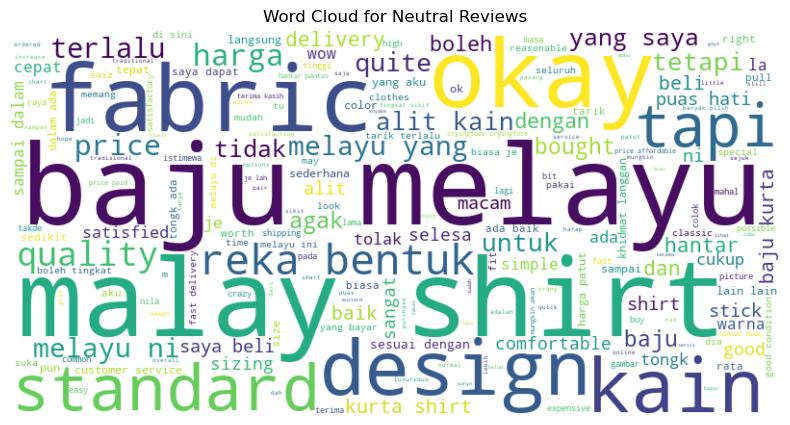

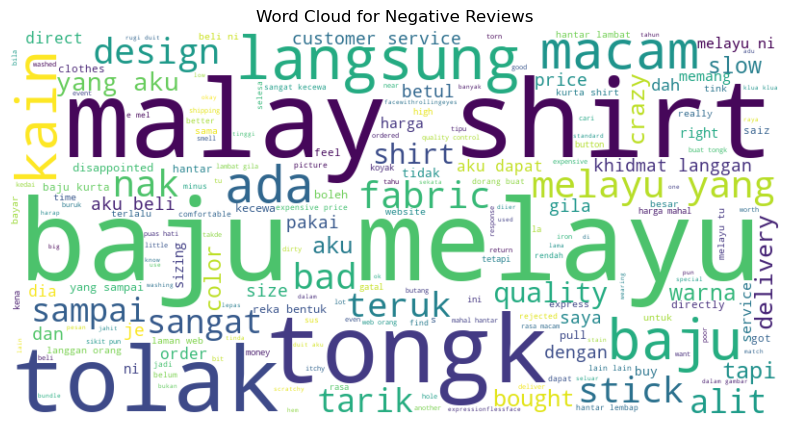

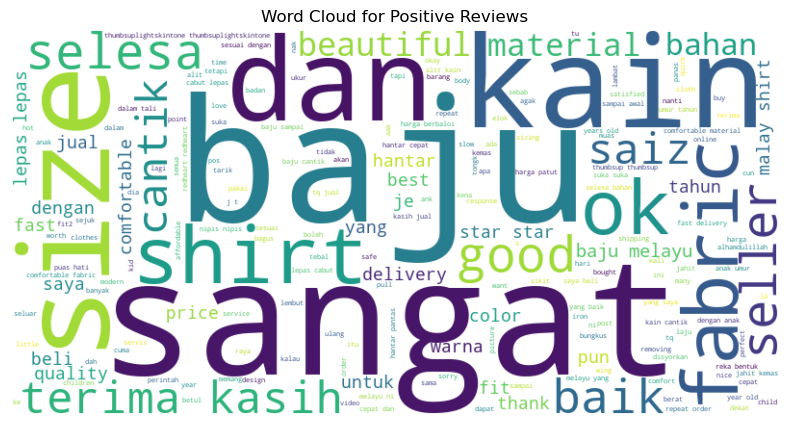

In [52]:
# Function to generate and display word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    # Filter the DataFrame for the specified sentiment category
    filtered_data = combined_df[combined_df['Sentiment_Rating'] == sentiment_category]

    # Concatenate all reviews in the filtered DataFrame
    text = ' '.join(filtered_data['lemma_text'])

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {sentiment_category} Reviews')
    plt.show()

# Generate word clouds for each sentiment category
sentiment_categories = combined_df['Sentiment_Rating'].unique()
for category in sentiment_categories:
    generate_word_cloud(category)


In [53]:
combined_df.to_csv("processed_data.csv", index=False)

# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Save as CSV File</p>

In [54]:
# Create a DataFrame with only the desired columns
selected_columns = ['stemming_text','lemma_text', 'Sentiment_Rating']
selected_data = combined_df[selected_columns]

# Save the selected columns to a CSV file
selected_data.to_csv('Contraction Review & Sentiment Rating.csv', index=False)

# Display a message indicating that the CSV file has been created
print("Selected columns saved to Contraction Review & Sentiment Rating.csv")


Selected columns saved to Contraction Review & Sentiment Rating.csv



# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Feature Engineering </p>

In [2]:
finalData = pd.read_csv('Contraction Review & Sentiment Rating.csv')

finalData.isnull().any().any()

False

In [3]:
finalData

,stemming_text,lemma_text,Sentiment_Rating
0,baju kurta sampai dalam ada baik tapi tarik ada,Baju kurta Sampai Dalam Keadaan Baik Tapi Tari...,Neutral
1,sizing tinda tepat langsung aku rasa macam baj...,SIZING TINDA Tepat Langsung Aku Rasa Macam Baj...,Negative
2,baju kurta saya dah koyak belum pakai memang t...,Baju kurta saya dah koyak Sebelum pakai memang...,Negative
3,hantar laju kain cantik terima kasih jual masi...,Penghantaran Laju Kain Cantik Terima kasih Pen...,Positive
4,baju selamat darat kain cantik dan sedap di pa...,Baju Selamat Mendarat Kain Cantik Dan Sedap Di...,Positive
...,...,...,...
919,ons the shirt there is a red tried to wash still,Ons the shirt there is a red tried to wash still,Neutral
920,the color is slightly different from the pictu...,The color is slightly different from the pictu...,Negative
921,nude color we ask for another color that forge...,Nude color we ask for another color that forge...,Negative
922,reject following the size i want,Reject following the size I want,Positive


In [4]:
finalData.columns

Index(['stemming_text', 'lemma_text', 'Sentiment_Rating'], dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(finalData['lemma_text'], finalData['Sentiment_Rating'], test_size=0.2, random_state=42)

# Print the shapes of training and testing sets
print("Number of samples in Training Set:", len(X_train))
print("Number of samples in Testing Set:", len(X_test))

Number of samples in Training Set: 739
Number of samples in Testing Set: 185


In [6]:
# Tokenise the text data
tokenized_data_train = X_train.apply(lambda x: word_tokenize(x.lower()))
tokenized_data_test = X_test.apply(lambda x: word_tokenize(x.lower()))


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">TF-IDF</p>

In [7]:
# Convert it into tf-idf 
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on your dataset size

x_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
x_test_tfidf = tfidf_vectorizer.transform(X_test)

print(x_train_tfidf)
print('===================')
print(x_test_tfidf)


  (0, 538)	0.30801000620961827
  (0, 423)	0.24222269976044206
  (0, 583)	0.20955903953890317
  (0, 135)	0.19749794504964388
  (0, 424)	0.26751573230768866
  (0, 64)	0.2838711539972618
  (0, 867)	0.21109225379668994
  (0, 866)	0.1877375216006253
  (0, 56)	0.2066234483678532
  (0, 84)	0.10792133761017328
  (0, 803)	0.20955903953890317
  (0, 131)	0.2986461782714408
  (0, 258)	0.2986461782714408
  (0, 218)	0.3364947318825552
  (0, 728)	0.17321001040040507
  (0, 590)	0.33424542966402965
  (1, 500)	0.300762164279752
  (1, 199)	0.3067365360421723
  (1, 403)	0.2953576876279535
  (1, 744)	0.32972806448528696
  (1, 585)	0.300762164279752
  (1, 198)	0.3690323419642196
  (1, 946)	0.2154748299145901
  (1, 784)	0.2313690967100046
  (1, 870)	0.3067365360421723
  :	:
  (738, 916)	0.06062275890542301
  (738, 223)	0.07805173606864736
  (738, 741)	0.08534385340986643
  (738, 105)	0.0586289757614624
  (738, 885)	0.06631842356585194
  (738, 991)	0.04844199501806472
  (738, 758)	0.06718669551332034
  (738, 


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">GloVe</p>

In [8]:
# paste in anacondaconsole
# python -m spacy download en_core_web_md

In [9]:
# Load pre-trained GloVe vectors using spaCy
nlp = spacy.load('en_core_web_md') 

x_train_glo = []
for text in tokenized_data_train:
    doc = nlp(' '.join(text))  # Concatenate tokens into a single string
    doc_vector = np.mean([token.vector for token in doc], axis=0)
    x_train_glo.append(doc_vector)

x_test_glo = []
for text in tokenized_data_test:
    doc = nlp(' '.join(text))
    doc_vector = np.mean([token.vector for token in doc], axis=0)
    x_test_glo.append(doc_vector)

    
    
print(x_train_glo)
print('===========================')
print(x_test_glo)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[array([-2.65780002e-01,  1.07513809e+00, -8.03924680e-01,  1.27331138e-01,
        1.18994129e+00, -9.62683320e-01, -1.09075993e-01,  6.03162646e-01,
       -5.98759949e-01,  2.29231436e-02,  1.71712077e+00,  1.45808053e+00,
       -2.82073796e-01, -3.22224677e-01,  2.05743313e-01,  2.80990034e-01,
        2.57175803e-01,  2.12736681e-01,  1.61380008e-01, -8.11500400e-02,
       -5.30626595e-01,  6.31938279e-01, -5.53231359e-01,  8.24286714e-02,
       -4.76199329e-01, -1.55686641e+00, -6.00994766e-01, -7.13512123e-01,
       -3.30000557e-02, -7.37037957e-01, -7.40114748e-01, -2.19193865e-02,
       -7.00561285e-01, -8.83466661e-01,  1.88384068e+00,  3.26337993e-01,
       -7.40482688e-01,  8.34108055e-01, -1.82095194e+00,  3.40876043e-01,
       -3.08743984e-01, -1.60198390e+00, -4.72732663e-01,  4.43938673e-01,
        4.74036694e-01,  8.40080619e-01, -1.14279485e+00,  3.67668481e-03,
       -2.82334685e-01, -6.57068789e-01, -1.11043274e+00, -3.00615996e-01,
       -1.02101529e+00, 


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Normalisation</p>

In [10]:
def min_max_scaling(embeddings):
    min_vals = np.min(embeddings, axis=0)
    max_vals = np.max(embeddings, axis=0)
    normalized_embeddings = (embeddings - min_vals) / (max_vals - min_vals)
    return normalized_embeddings


# x_train_w2v = min_max_scaling(x_train_w2v)
x_train_glo = min_max_scaling(x_train_glo)

# x_test_w2v = min_max_scaling(x_test_w2v)
x_test_glo = min_max_scaling(x_test_glo)


# <p style="padding:10px;background-color:#DFCCFB;margin:0;color:#213555;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Model Training, Testing and Evaluation</p>


# <p style="padding:10px;background-color:gold;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:300">Supervised Learning</p>


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Support Vector Machine (SVM)</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [11]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': [0.1, 0.01, 0.001, 0.0001]
}

# Instantiate SVM model
svm = SVC()

# Instantiate GridSearchCV
grid_search_tfidf_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV
grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  :", best_params_tfidf)
print("Best Parameters for GloVe   :", best_params_glo)

Best Parameters for TD-IDF  : {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
Best Parameters for GloVe   : {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">SVM Modeling</p>

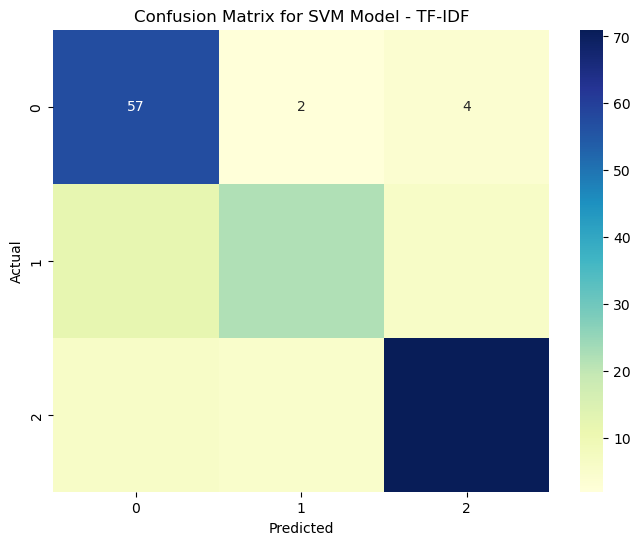

In [69]:
cm_svm_tfidf = confusion_matrix(y_test, svm_predictions_tfidf)
cm_svm_glo = confusion_matrix(y_test, svm_predictions_glo)

# Plot the confusion matrix for SVM - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - TF-IDF')
plt.show()

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics for SVM using TF-IDF
accuracy_svm_tfidf = accuracy_score(y_test, svm_predictions_tfidf)
precision_svm_tfidf = precision_score(y_test, svm_predictions_tfidf, average='macro')
recall_svm_tfidf = recall_score(y_test, svm_predictions_tfidf, average='macro')
f1_svm_tfidf = f1_score(y_test, svm_predictions_tfidf, average='macro')

# Calculate performance metrics for SVM using GloVe
accuracy_svm_glo = accuracy_score(y_test, svm_predictions_glo)
precision_svm_glo = precision_score(y_test, svm_predictions_glo, average='macro')
recall_svm_glo = recall_score(y_test, svm_predictions_glo, average='macro')
f1_svm_glo = f1_score(y_test, svm_predictions_glo, average='macro')

print('SVM Model Metrics for TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_tfidf*100))
print('Precision (Macro) : {:.2f} %'.format(precision_svm_tfidf*100))
print('Recall (Macro)    : {:.2f} %'.format(recall_svm_tfidf*100))
print('F1 Score (Macro)  : {:.2f} %'.format(f1_svm_tfidf*100))
print('')
print('SVM Model Metrics for GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_svm_glo*100))
print('Precision (Macro) : {:.2f} %'.format(precision_svm_glo*100))
print('Recall (Macro)    : {:.2f} %'.format(recall_svm_glo*100))
print('F1 Score (Macro)  : {:.2f} %'.format(f1_svm_glo*100))

SVM Model Metrics for TF-IDF:
Accuracy  : 81.08 %
Precision (Macro) : 79.84 %
Recall (Macro)    : 77.35 %
F1 Score (Macro)  : 77.83 %

SVM Model Metrics for GloVe:
Accuracy  : 64.86 %
Precision (Macro) : 64.79 %
Recall (Macro)    : 60.39 %
F1 Score (Macro)  : 61.06 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

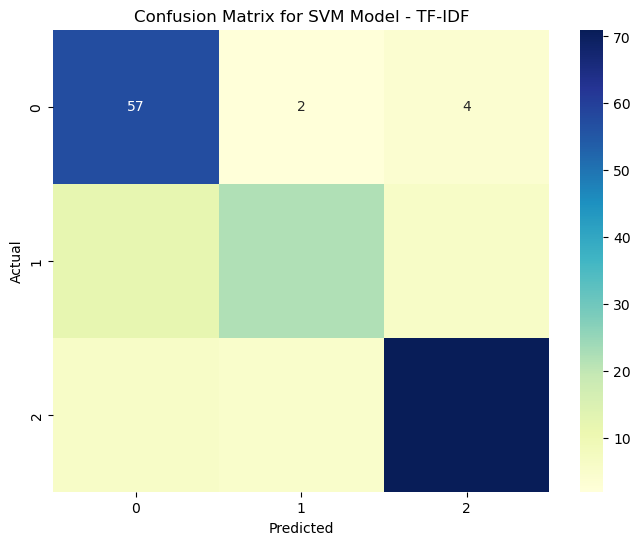

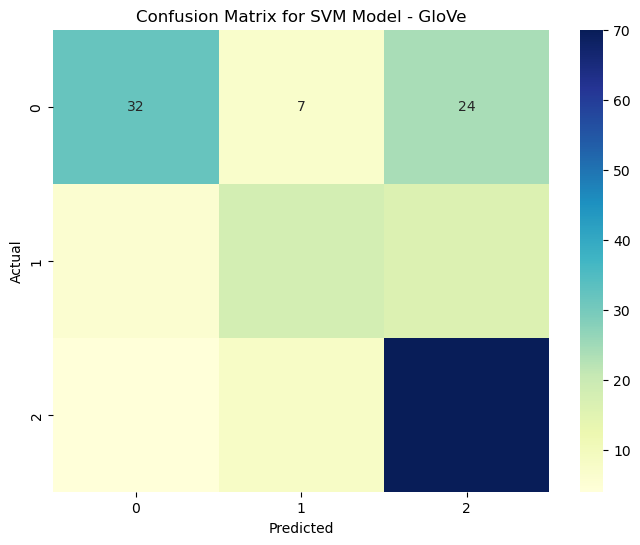

In [28]:
# Calculate the confusion matrix for SVM
cm_svm_tfidf = confusion_matrix(y_test, svm_predictions_tfidf)
cm_svm_glo = confusion_matrix(y_test, svm_predictions_glo)

# Plot the confusion matrix for SVM - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - TF-IDF')
plt.show()

# Plot the confusion matrix for SVM - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Model - GloVe')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [68]:
# Define the parameter grid
param_grid = {
  'n_estimators': [100, 200, 300, 1000],  # Number of trees in the forest
  'max_depth': [40, 60, 80, 100],       # Maximum depth of individual trees
  'max_features': ['auto', 'sqrt', 'log2'] # Number of features considered at each split
}

# Create the RandomForestClassifier model
rf = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  : ", best_params_tfidf)
print("Best Parameters for GloVe   : ", best_params_glo)

Best Parameters for TD-IDF  :  {'max_depth': 80, 'max_features': 'log2', 'n_estimators': 300}
Best Parameters for GloVe   :  {'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 1000}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Forest Modeling</p>

In [29]:
# Initialize Random Forest Classifier
rf_classifier_tfidf = RandomForestClassifier(**{'max_depth': 80, 'max_features': 'log2', 'n_estimators': 300})
rf_classifier_glo   = RandomForestClassifier(**{'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 1000})

# Fit the classifier on the training data
rf_classifier_tfidf.fit(x_train_tfidf, y_train)
rf_classifier_glo.fit(x_train_glo, y_train)

# Predict on the testing data
rf_predictions_tfidf = rf_classifier_tfidf.predict(x_test_tfidf)
rf_predictions_glo = rf_classifier_glo.predict(x_test_glo)

In [30]:
# Calculate performance metrics for rf
accuracy_rf_tfidf  = accuracy_score(y_test, rf_predictions_tfidf)
precision_rf_tfidf = precision_score(y_test, rf_predictions_tfidf, average='macro')
recall_rf_tfidf    = recall_score(y_test, rf_predictions_tfidf, average='macro')
f1_rf_tfidf        = f1_score(y_test, rf_predictions_tfidf, average='macro')

accuracy_rf_glo    = accuracy_score(y_test, rf_predictions_glo)
precision_rf_glo   = precision_score(y_test, rf_predictions_glo, average='macro')
recall_rf_glo      = recall_score(y_test, rf_predictions_glo, average='macro')
f1_rf_glo          = f1_score(y_test, rf_predictions_glo, average='macro')

print('Random Forest Metrics TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_tfidf*100))
print('Precision : {:.2f} %'.format(precision_rf_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_rf_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_tfidf*100))
print('')
print('Random Forest Metrics for GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_rf_glo*100))
print('Precision : {:.2f} %'.format(precision_rf_glo*100))
print('Recall    : {:.2f} %'.format(recall_rf_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_rf_glo*100))

Random Forest Metrics TF-IDF:
Accuracy  : 81.62 %
Precision : 79.81 %
Recall    : 78.55 %
F1 Score  : 78.99 %

Random Forest Metrics for GloVe:
Accuracy  : 63.24 %
Precision : 63.29 %
Recall    : 57.09 %
F1 Score  : 57.52 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

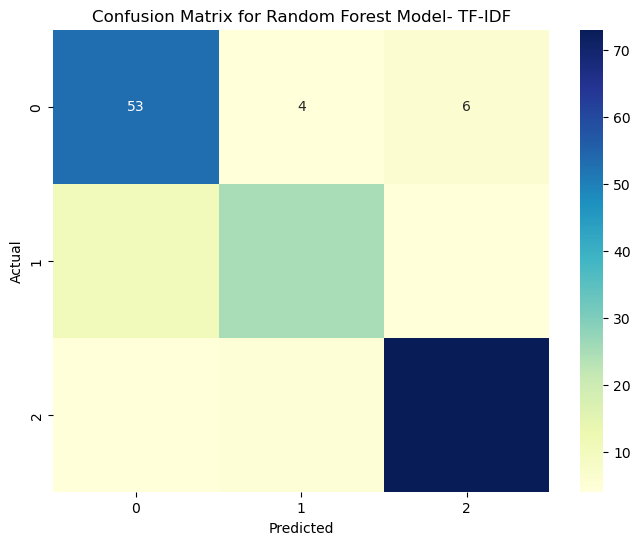

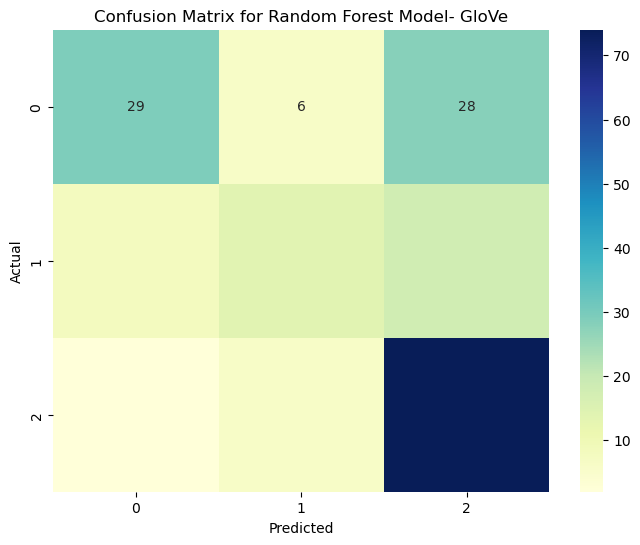

In [31]:
# Calculate the confusion matrix for rf
cm_rf_tfidf = confusion_matrix(y_test, rf_predictions_tfidf)
cm_rf_glo = confusion_matrix(y_test, rf_predictions_glo)

# Plot the confusion matrix for rf - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model- TF-IDF')
plt.show()

# Plot the confusion matrix for rf - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Model- GloVe')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Decision Tree</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [72]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TD-IDF  : ", best_params_tfidf)
print("Best Parameters for GloVe   : ", best_params_glo)

Best Parameters for TD-IDF  :  {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Parameters for GloVe   :  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Decision Tree Modeling</p>

In [36]:
# Initialize Random Forest Classifier
dt_classifier_tfidf = DecisionTreeClassifier(**{'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2})
dt_classifier_glo   = DecisionTreeClassifier(**{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2})

# Fit the classifier on the training data
dt_classifier_tfidf.fit(x_train_tfidf, y_train)
dt_classifier_glo.fit(x_train_glo, y_train)

# Predict on the testing data
dt_predictions_tfidf = dt_classifier_tfidf.predict(x_test_tfidf)
dt_predictions_glo   = dt_classifier_glo.predict(x_test_glo)

In [37]:
# Calculate performance metrics for decision tree
accuracy_dt_tfidf  = accuracy_score(y_test, dt_predictions_tfidf)
precision_dt_tfidf = precision_score(y_test, dt_predictions_tfidf, average='macro')
recall_dt_tfidf    = recall_score(y_test, dt_predictions_tfidf, average='macro')
f1_dt_tfidf        = f1_score(y_test, dt_predictions_tfidf, average='macro')

accuracy_dt_glo  = accuracy_score(y_test, dt_predictions_glo)
precision_dt_glo = precision_score(y_test, dt_predictions_glo, average='macro')
recall_dt_glo    = recall_score(y_test, dt_predictions_glo, average='macro')
f1_dt_glo        = f1_score(y_test, dt_predictions_glo, average='macro')

print('DT Model Metrics TF-IDF::')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_tfidf*100))
print('Precision : {:.2f} %'.format(precision_dt_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_dt_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_tfidf*100))
print('')
print('DT Model Metrics GloVe::')
print('Accuracy  : {:.2f} %'.format(accuracy_dt_glo*100))
print('Precision : {:.2f} %'.format(precision_dt_glo*100))
print('Recall    : {:.2f} %'.format(recall_dt_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_dt_glo*100))

DT Model Metrics TF-IDF::
Accuracy  : 63.78 %
Precision : 60.92 %
Recall    : 60.44 %
F1 Score  : 60.25 %

DT Model Metrics GloVe::
Accuracy  : 50.81 %
Precision : 48.79 %
Recall    : 47.68 %
F1 Score  : 47.63 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

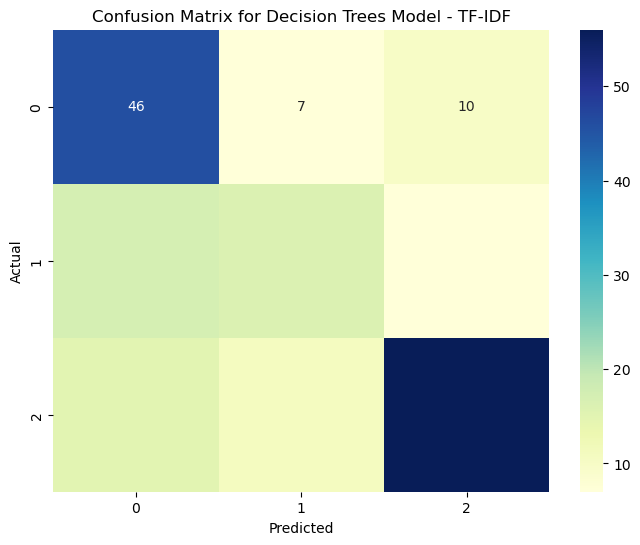

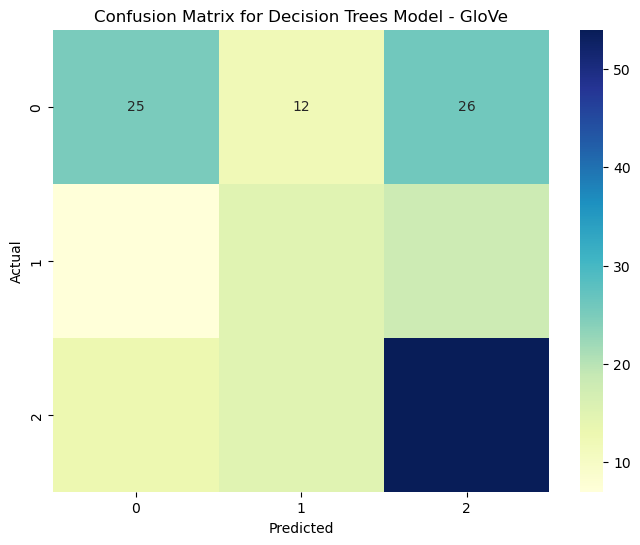

In [38]:
# Calculate the confusion matrix for devision tree
cm_svm_tfidf = confusion_matrix(y_test, dt_predictions_tfidf)
cm_svm_glo   = confusion_matrix(y_test, dt_predictions_glo)

# Plot the confusion matrix for decision tree - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - TF-IDF')
plt.show()

# Plot the confusion matrix for decision tree - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Trees Model - GloVe')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression Model</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [76]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'],  
    'solver': ['liblinear', 'saga']  
}

# Create a logistic regression classifier
logistic_regression = LogisticRegression()

# Perform grid search with cross-validation
grid_search_tfidf_temp = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the Best Parameter
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for GloVe  :", best_params_glo)


Best Parameters for TF-IDF : {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Parameters for GloVe  : {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Logistic Regression Modeling</p>

In [39]:
# Initialize Logistic Regression Classifier
logistic_regression_tfidf   = LogisticRegression(**{'C': 1, 'penalty': 'l2', 'solver': 'saga'})
logistic_regression_glo     = LogisticRegression(**{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'})

# Fit the classifier on the training data
logistic_regression_tfidf.fit(x_train_tfidf, y_train)
logistic_regression_glo.fit(x_train_glo, y_train)

# Predict on the testing data
lr_predictions_tfidf = logistic_regression_tfidf.predict(x_test_tfidf)
lr_predictions_glo   = logistic_regression_glo.predict(x_test_glo)

In [40]:
# Calculate performance metrics for logistic Regression
accuracy_lr_tfidf  = accuracy_score(y_test, lr_predictions_tfidf)
precision_lr_tfidf = precision_score(y_test, lr_predictions_tfidf, average='macro')
recall_lr_tfidf    = recall_score(y_test, lr_predictions_tfidf, average='macro')
f1_lr_tfidf        = f1_score(y_test, lr_predictions_tfidf, average='macro')

accuracy_lr_glo  = accuracy_score(y_test, lr_predictions_glo)
precision_lr_glo = precision_score(y_test, lr_predictions_glo, average='macro')
recall_lr_glo    = recall_score(y_test, lr_predictions_glo, average='macro')
f1_lr_glo        = f1_score(y_test, lr_predictions_glo, average='macro')

print('Logistic Regression Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_tfidf*100))
print('Precision : {:.2f} %'.format(precision_lr_tfidf*100))
print('Recall    : {:.2f} %'.format(recall_lr_tfidf*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_tfidf*100))
print('')
print('Logistic Regression Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_lr_glo*100))
print('Precision : {:.2f} %'.format(precision_lr_glo*100))
print('Recall    : {:.2f} %'.format(recall_lr_glo*100))
print('F1 Score  : {:.2f} %'.format(f1_lr_glo*100))

Logistic Regression Model Metrics - TF-IDF:
Accuracy  : 81.62 %
Precision : 82.01 %
Recall    : 77.39 %
F1 Score  : 78.53 %

Logistic Regression Model Metrics - GloVe:
Accuracy  : 50.81 %
Precision : 55.34 %
Recall    : 43.52 %
F1 Score  : 38.94 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

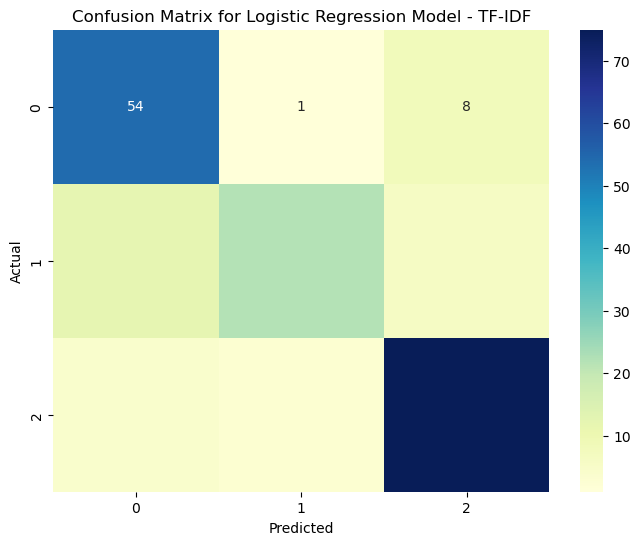

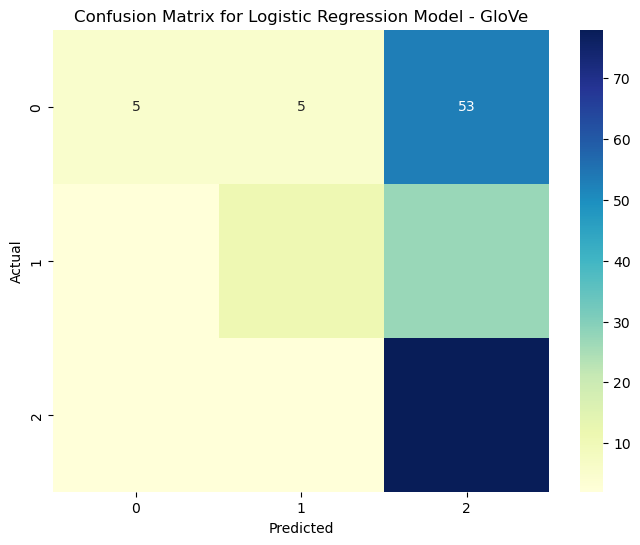

In [41]:
# Calculate the Confusion Matrix for Logistic Regression
cm_svm_tfidf = confusion_matrix(y_test, lr_predictions_tfidf)
cm_svm_glo   = confusion_matrix(y_test, lr_predictions_glo)

# Plot the confusion matrix for decision tree - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - TF-IDF')
plt.show()

# Plot the confusion matrix for decision tree - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model - GloVe')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Naive Bayes</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [80]:
# Define parameter grid
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}

# Instantiate Naive Bayes model
naive_bayes = MultinomialNB()

# Instantiate GridSearchCV
grid_search_tfidf_temp = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(naive_bayes, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for GloVe  :", best_params_glo)

Best Parameters for TF-IDF : {'alpha': 0.5}
Best Parameters for GloVe  : {'alpha': 0.1}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Naive Bayes Modeling</p>

In [42]:
# Create Naive Bayes model with the best parameters
nb_tfidf   = MultinomialNB(**{'alpha': 0.5})
nb_glo     = MultinomialNB(**{'alpha': 0.1})

# Train the best Logistic Regression model on your training data
nb_tfidf.fit(x_train_tfidf, y_train)
nb_glo.fit(x_train_glo, y_train)

# Predict on the testing data
nb_predictions_tfidf = nb_tfidf.predict(x_test_tfidf)
nb_predictions_glo   = nb_glo.predict(x_test_glo)

In [43]:
# Calculate performance metrics for Naive Bayes
accuracy_nb_tfidf   = accuracy_score(y_test, nb_predictions_tfidf)
precision_nb_tfidf  = precision_score(y_test, nb_predictions_tfidf, average='macro')
recall_nb_tfidf     = recall_score(y_test, nb_predictions_tfidf, average='macro')
f1_nb_tfidf         = f1_score(y_test, nb_predictions_tfidf, average='macro')

accuracy_nb_glo   = accuracy_score(y_test, nb_predictions_glo )
precision_nb_glo  = precision_score(y_test, nb_predictions_glo , average='macro')
recall_nb_glo     = recall_score(y_test, nb_predictions_glo , average='macro')
f1_nb_glo         = f1_score(y_test, nb_predictions_glo , average='macro')

print('Naive Bayes Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_nb_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_nb_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_tfidf * 100))
print('')
print('Naive Bayes Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_nb_glo  * 100))
print('Precision : {:.2f} %'.format(precision_nb_glo  * 100))
print('Recall    : {:.2f} %'.format(recall_nb_glo  * 100))
print('F1 Score  : {:.2f} %'.format(f1_nb_glo  * 100))

Naive Bayes Model Metrics - TF-IDF:
Accuracy  : 80.00 %
Precision : 78.86 %
Recall    : 77.03 %
F1 Score  : 77.49 %

Naive Bayes Model Metrics - GloVe:
Accuracy  : 48.11 %
Precision : 45.70 %
Recall    : 42.10 %
F1 Score  : 41.03 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

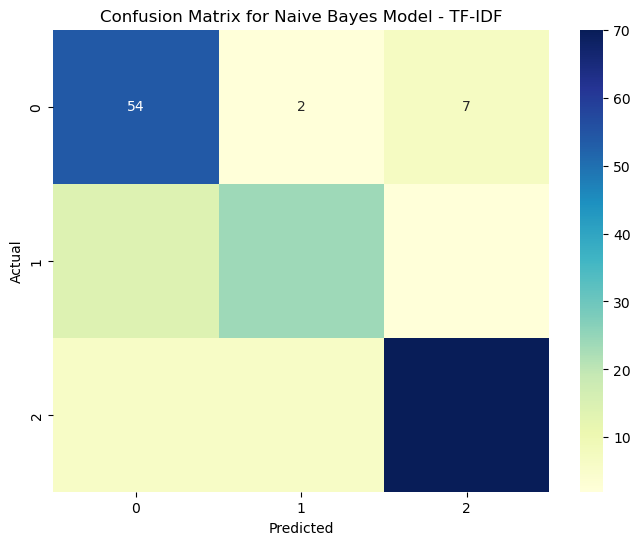

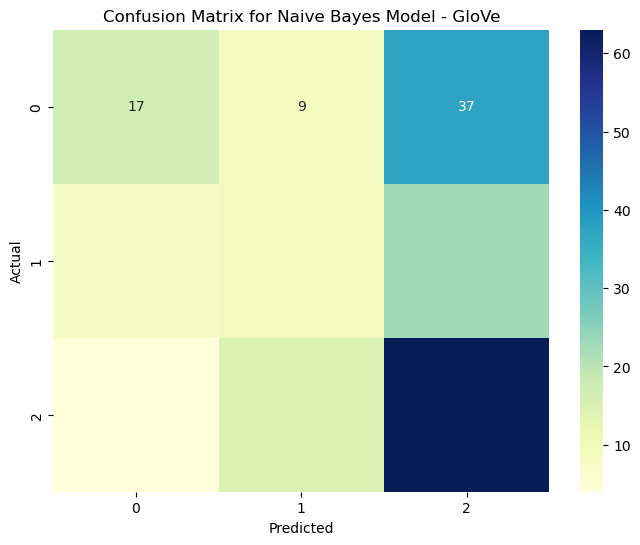

In [44]:
# Calculate the confusion matrix for Naive Bayes
cm_nb_tfidf = confusion_matrix(y_test, nb_predictions_tfidf)
cm_nb_glo   = confusion_matrix(y_test, nb_predictions_glo)

# Plot the confusion matrix for Naive Bayes - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - TF-IDF')
plt.show()

# Plot the confusion matrix for Naive Bayes - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes Model - GloVe')
plt.show()


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">K-NN</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [84]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create k-NN classifier
knn = KNeighborsClassifier()

grid_search_tfidf_temp = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for GloVe  :", best_params_glo)

Best Parameters for TF-IDF : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Best Parameters for GloVe  : {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">KNN Modeling</p>

In [45]:
# Use the best model to make predictions
knn_tfidf   = KNeighborsClassifier(**{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'})
knn_glo     = KNeighborsClassifier(**{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'})

knn_tfidf.fit(x_train_tfidf, y_train)
knn_glo.fit(x_train_glo, y_train)

knn_predictions_tfidf = knn_tfidf.predict(x_test_tfidf)
knn_predictions_glo   = knn_glo.predict(x_test_glo)

In [46]:
# Calculate performance metrics for SVM
accuracy_knn_tfidf  = accuracy_score(y_test, knn_predictions_tfidf)
precision_knn_tfidf = precision_score(y_test, knn_predictions_tfidf, average='macro')
recall_knn_tfidf    = recall_score(y_test, knn_predictions_tfidf, average='macro')
f1_knn_tfidf         = f1_score(y_test, knn_predictions_tfidf, average='macro')

accuracy_knn_glo = accuracy_score(y_test, knn_predictions_glo)
precision_knn_glo = precision_score(y_test, knn_predictions_glo, average='macro')
recall_knn_glo = recall_score(y_test, knn_predictions_glo, average='macro')
f1_knn_glo = f1_score(y_test, knn_predictions_glo, average='macro')

print('KNN Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_knn_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_knn_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_tfidf * 100))
print('')
print('KNN Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_knn_glo * 100))
print('Precision : {:.2f} %'.format(precision_knn_glo * 100))
print('Recall    : {:.2f} %'.format(recall_knn_glo * 100))
print('F1 Score  : {:.2f} %'.format(f1_knn_glo * 100))

KNN Model Metrics - TF-IDF:
Accuracy  : 74.05 %
Precision : 72.12 %
Recall    : 72.80 %
F1 Score  : 72.00 %

KNN Model Metrics - GloVe:
Accuracy  : 60.00 %
Precision : 54.91 %
Recall    : 53.80 %
F1 Score  : 53.49 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

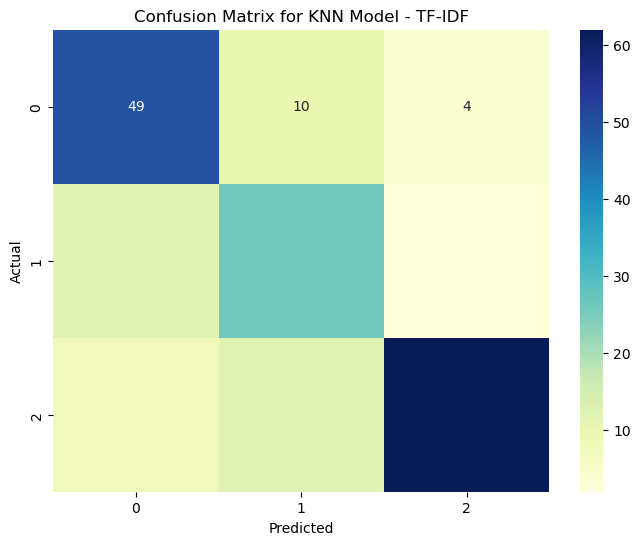

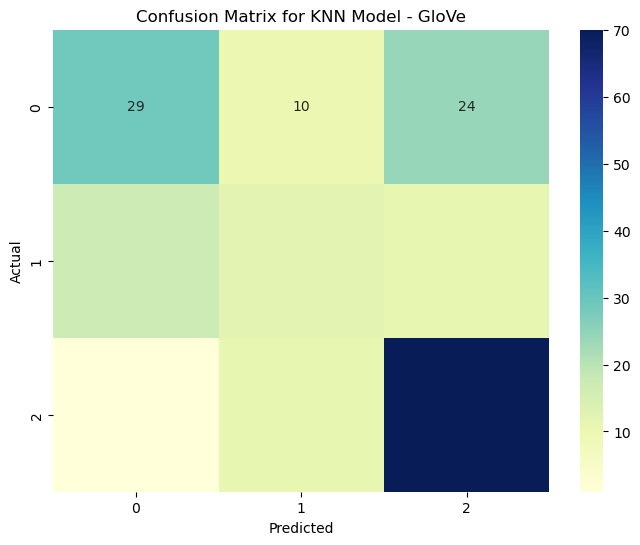

In [47]:
# Calculate the confusion matrix for KNN
cm_nb_tfidf = confusion_matrix(y_test, knn_predictions_tfidf)
cm_nb_glo = confusion_matrix(y_test, knn_predictions_glo)

# Plot the confusion matrix for KNN - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - TF-IDF')
plt.show()
                                  
# Plot the confusion matrix for KNN - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN Model - GloVe')
plt.show()                            


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Adaboost</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [88]:
# Define parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Define base learner
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier = AdaBoostClassifier(base_classifier, random_state=42)

grid_search_tfidf_temp = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search_glo_temp   = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')

grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# Get the best parameters
best_params_tfidf = grid_search_tfidf.best_params_
best_params_glo   = grid_search_glo.best_params_

print("Best Parameters for TF-IDF :", best_params_tfidf)
print("Best Parameters for GloVe  :", best_params_glo)

Best Parameters for TF-IDF : {'learning_rate': 0.1, 'n_estimators': 150}
Best Parameters for GloVe  : {'learning_rate': 0.5, 'n_estimators': 150}



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">AdaBoost Modeling</p>

In [48]:
base_classifier = DecisionTreeClassifier(max_depth=1)
adaboost_classifier_tfidf = AdaBoostClassifier(**{'learning_rate': 0.1, 'n_estimators': 150})
adaboost_classifier_glo = AdaBoostClassifier(**{'learning_rate': 0.5, 'n_estimators': 150})

adaboost_classifier_tfidf.fit(x_train_tfidf, y_train)
adaboost_classifier_glo.fit(x_train_glo, y_train)

# Predictions
adaboost_predictions_tfidf = adaboost_classifier_tfidf.predict(x_test_tfidf)
adaboost_predictions_glo   = adaboost_classifier_glo.predict(x_test_glo)

In [49]:
# Calculate performance metrics for AdaBoost
accuracy_adaboost_tfidf  = accuracy_score(y_test, adaboost_predictions_tfidf)
precision_adaboost_tfidf = precision_score(y_test, adaboost_predictions_tfidf, average='macro')
recall_adaboost_tfidf    = recall_score(y_test, adaboost_predictions_tfidf, average='macro')
f1_adaboost_tfidf         = f1_score(y_test, adaboost_predictions_tfidf, average='macro')

accuracy_adaboost_glo = accuracy_score(y_test, adaboost_predictions_glo)
precision_adaboost_glo = precision_score(y_test, adaboost_predictions_glo, average='macro')
recall_adaboost_glo = recall_score(y_test, adaboost_predictions_glo, average='macro')
f1_adaboost_glo = f1_score(y_test, adaboost_predictions_glo, average='macro')

print('Adaboost Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_adaboost_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_adaboost_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_adaboost_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_adaboost_tfidf * 100))
print('')
print('Adaboost Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_adaboost_glo * 100))
print('Precision : {:.2f} %'.format(precision_adaboost_glo * 100))
print('Recall    : {:.2f} %'.format(recall_adaboost_glo * 100))
print('F1 Score  : {:.2f} %'.format(f1_adaboost_glo * 100))

Adaboost Model Metrics - TF-IDF:
Accuracy  : 69.73 %
Precision : 69.01 %
Recall    : 65.76 %
F1 Score  : 66.68 %

Adaboost Model Metrics - GloVe:
Accuracy  : 56.76 %
Precision : 51.53 %
Recall    : 50.51 %
F1 Score  : 49.91 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusioon Matrix</p>

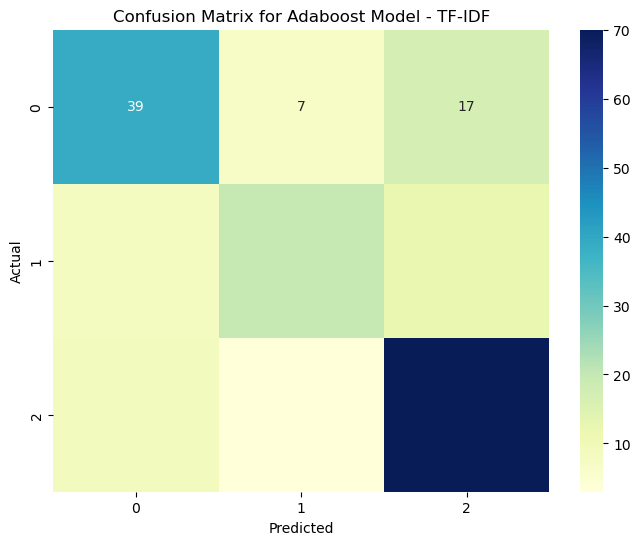

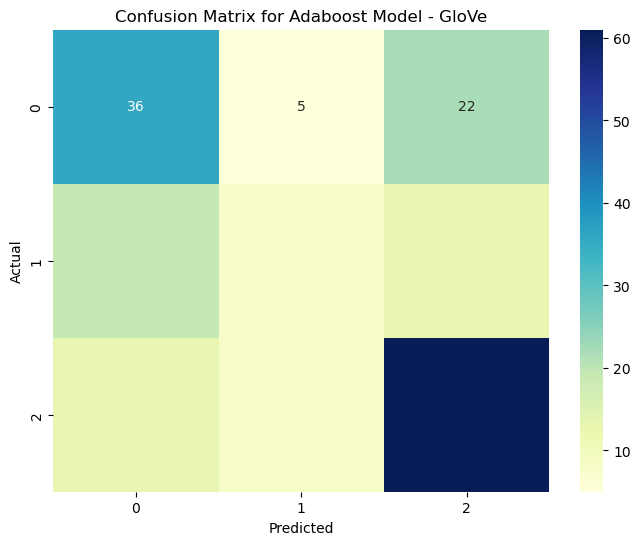

In [50]:
# Calculate the confusion matrix for AdaBoost
cm_nb_tfidf = confusion_matrix(y_test, adaboost_predictions_tfidf)
cm_nb_glo = confusion_matrix(y_test, adaboost_predictions_glo)

# Plot the confusion matrix for AdaBoost - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Adaboost Model - TF-IDF')
plt.show()
                             
# Plot the confusion matrix for AdaBoost - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Adaboost Model - GloVe')
plt.show()                            


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Gradient Boosting</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [92]:
# # Define parameter grid for grid search
# param_grid = {
#     'n_estimators': [50, 100, 150],
#     'learning_rate': [0.1, 0.5, 1.0],
#     'max_depth': [3, 5, 7]
# }

# gradient_boosting_classifier = GradientBoostingClassifier(random_state=42)

# grid_search_tfidf_temp = GridSearchCV(gradient_boosting_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search_glo_temp   = GridSearchCV(gradient_boosting_classifier, param_grid, cv=5, scoring='accuracy')

# grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# # Get the best parameters
# best_params_tfidf = grid_search_tfidf.best_params_
# best_params_glo   = grid_search_glo.best_params_

# print("Best Parameters for TF-IDF :", best_params_tfidf)
# print("Best Parameters for GloVe  :", best_params_glo)


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Gradient Boosting Modeling</p>

In [51]:
gb_classifier_tfidf = GradientBoostingClassifier(random_state=42)
gb_classifier_glo = GradientBoostingClassifier(random_state=42)

gb_classifier_tfidf.fit(x_train_tfidf, y_train)
gb_classifier_glo.fit(x_train_glo, y_train)

# Predictions
gb_predictions_tfidf = gb_classifier_tfidf.predict(x_test_tfidf)
gb_predictions_glo   = gb_classifier_glo.predict(x_test_glo)

In [52]:
# Calculate performance metrics for Gradient Boosting
accuracy_gb_tfidf  = accuracy_score(y_test, gb_predictions_tfidf)
precision_gb_tfidf = precision_score(y_test, gb_predictions_tfidf, average='macro')
recall_gb_tfidf    = recall_score(y_test, gb_predictions_tfidf, average='macro')
f1_gb_tfidf         = f1_score(y_test, gb_predictions_tfidf, average='macro')

accuracy_gb_glo = accuracy_score(y_test, gb_predictions_glo)
precision_gb_glo = precision_score(y_test, gb_predictions_glo, average='macro')
recall_gb_glo = recall_score(y_test, gb_predictions_glo, average='macro')
f1_gb_glo = f1_score(y_test, gb_predictions_glo, average='macro')

print('Gradient Boosting Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_gb_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_gb_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_gb_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_gb_tfidf * 100))
print('')
print('Gradient Boosting Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_gb_glo * 100))
print('Precision : {:.2f} %'.format(precision_gb_glo * 100))
print('Recall    : {:.2f} %'.format(recall_gb_glo * 100))
print('F1 Score  : {:.2f} %'.format(f1_gb_glo * 100))

Gradient Boosting Model Metrics - TF-IDF:
Accuracy  : 77.84 %
Precision : 77.06 %
Recall    : 74.67 %
F1 Score  : 75.53 %

Gradient Boosting Model Metrics - GloVe:
Accuracy  : 62.70 %
Precision : 61.86 %
Recall    : 58.45 %
F1 Score  : 58.31 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

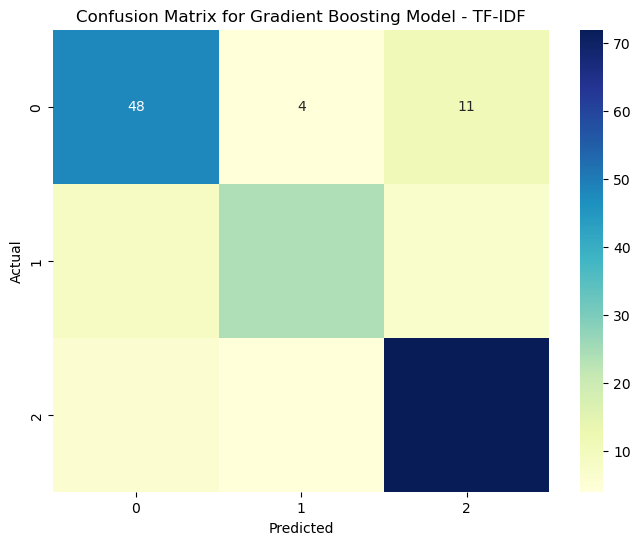

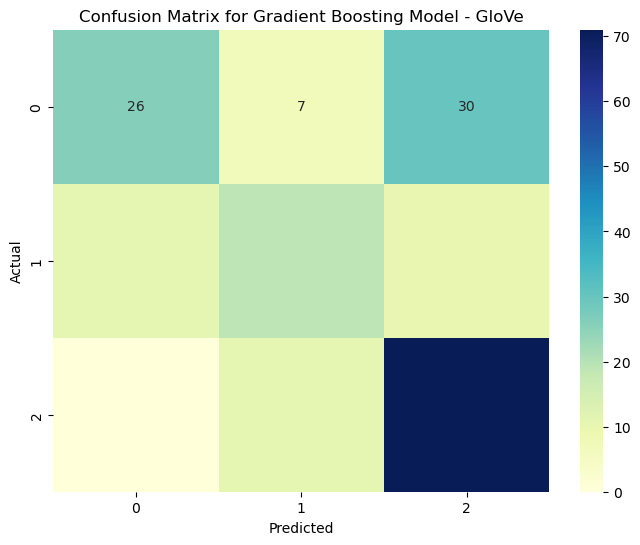

In [53]:
# Calculate the confusion matrix for Gradient Boosting
cm_nb_tfidf = confusion_matrix(y_test, gb_predictions_tfidf)
cm_nb_glo = confusion_matrix(y_test, gb_predictions_glo)

# Plot the confusion matrix for Gradient Boosting - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model - TF-IDF')
plt.show()
                             
# Plot the confusion matrix for Gradient Boosting - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model - GloVe')
plt.show()                            


# <p style="padding:10px;background-color:skyblue;margin:0;color:#213555;font-family:newtimeroman;font-size:70%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Subspace</p>


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Find Best Parameter</p>

In [ ]:
# # Define parameter grid for grid search
# param_grid = {
#     'base_estimator__n_estimators': [50, 100, 150],
#     'max_samples': [0.6, 0.8, 1.0],
#     'max_features': [0.6, 0.8, 1.0]
# }

# base_classifier = RandomForestClassifier(random_state=42)
# bagging_classifier = BaggingClassifier(random_state=42)

# grid_search_tfidf_temp = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search_glo_temp   = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy')

# grid_search_tfidf = grid_search_tfidf_temp.fit(x_train_tfidf, y_train)
# grid_search_glo   = grid_search_glo_temp.fit(x_train_glo, y_train)

# # Get the best parameters
# best_params_tfidf = grid_search_tfidf.best_params_
# best_params_glo   = grid_search_glo.best_params_


# print("Best Parameters for TF-IDF :", best_params_tfidf)
# print("Best Parameters for GloVe  :", best_params_glo)


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Random Subspace Modeling</p>

In [54]:
base_classifier = RandomForestClassifier(n_estimators=50, random_state=42)
rs_classifier_tfidf = BaggingClassifier(base_classifier, max_features=1.0, max_samples=1.0, random_state=42)

base_classifier = RandomForestClassifier(n_estimators=150, max_features=0.8, random_state=42)
rs_classifier_glo = BaggingClassifier(base_classifier, max_samples=1.0, random_state=42)

rs_classifier_tfidf.fit(x_train_tfidf, y_train)
rs_classifier_glo.fit(x_train_glo, y_train)

# Predictions
rs_predictions_tfidf = rs_classifier_tfidf.predict(x_test_tfidf)
rs_predictions_glo   = rs_classifier_glo.predict(x_test_glo)

In [55]:
# Calculate performance metrics for Random Subspace
accuracy_rs_tfidf  = accuracy_score(y_test, rs_predictions_tfidf)
precision_rs_tfidf = precision_score(y_test, rs_predictions_tfidf, average='macro')
recall_rs_tfidf    = recall_score(y_test, rs_predictions_tfidf, average='macro')
f1_rs_tfidf         = f1_score(y_test, rs_predictions_tfidf, average='macro')

accuracy_rs_glo = accuracy_score(y_test, rs_predictions_glo)
precision_rs_glo = precision_score(y_test, rs_predictions_glo, average='macro')
recall_rs_glo = recall_score(y_test, rs_predictions_glo, average='macro')
f1_rs_glo = f1_score(y_test, rs_predictions_glo, average='macro')

print('Random Subspace Model Metrics - TF-IDF:')
print('Accuracy  : {:.2f} %'.format(accuracy_rs_tfidf * 100))
print('Precision : {:.2f} %'.format(precision_rs_tfidf * 100))
print('Recall    : {:.2f} %'.format(recall_rs_tfidf * 100))
print('F1 Score  : {:.2f} %'.format(f1_rs_tfidf * 100))
print('')
print('Random Subspace Model Metrics - GloVe:')
print('Accuracy  : {:.2f} %'.format(accuracy_rs_glo * 100))
print('Precision : {:.2f} %'.format(precision_rs_glo * 100))
print('Recall    : {:.2f} %'.format(recall_rs_glo * 100))
print('F1 Score  : {:.2f} %'.format(f1_rs_glo * 100))

Random Subspace Model Metrics - TF-IDF:
Accuracy  : 78.92 %
Precision : 77.18 %
Recall    : 75.97 %
F1 Score  : 76.40 %

Random Subspace Model Metrics - GloVe:
Accuracy  : 63.78 %
Precision : 63.35 %
Recall    : 57.74 %
F1 Score  : 58.28 %



# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Confusion Matrix</p>

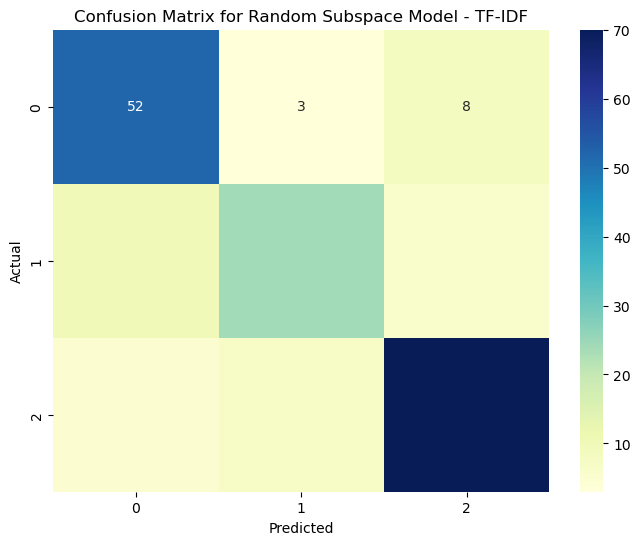

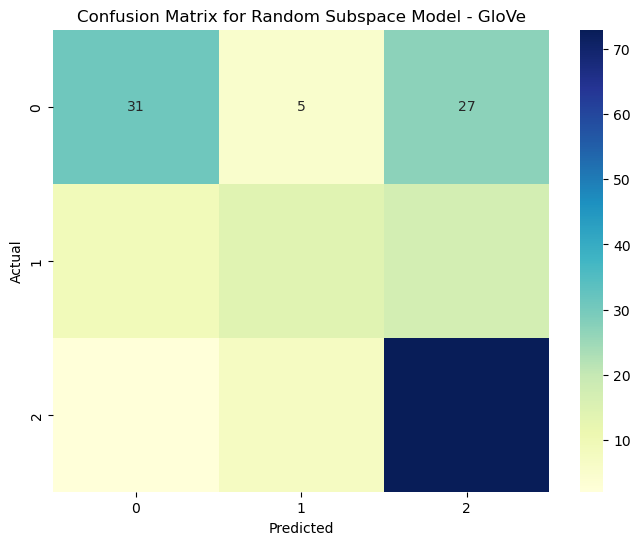

In [56]:
# Calculate the confusion matrix for Random Subspace
cm_nb_tfidf = confusion_matrix(y_test, rs_predictions_tfidf)
cm_nb_glo = confusion_matrix(y_test, rs_predictions_glo)

# Plot the confusion matrix for Random Subspace - TF-IDF
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_tfidf, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Subspace Model - TF-IDF')
plt.show()
                             
# Plot the confusion matrix for Random Subspace - GloVe
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb_glo, annot=True, fmt='d', cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Subspace Model - GloVe')
plt.show()                            


# <p style="padding:10px;background-color:pink;margin:0;color:#213555;font-family:newtimeroman;font-size:60%;text-align:center;border-radius: 50px 60px;overflow:hidden;font-weight:500">Comparison Between Modeling</p>

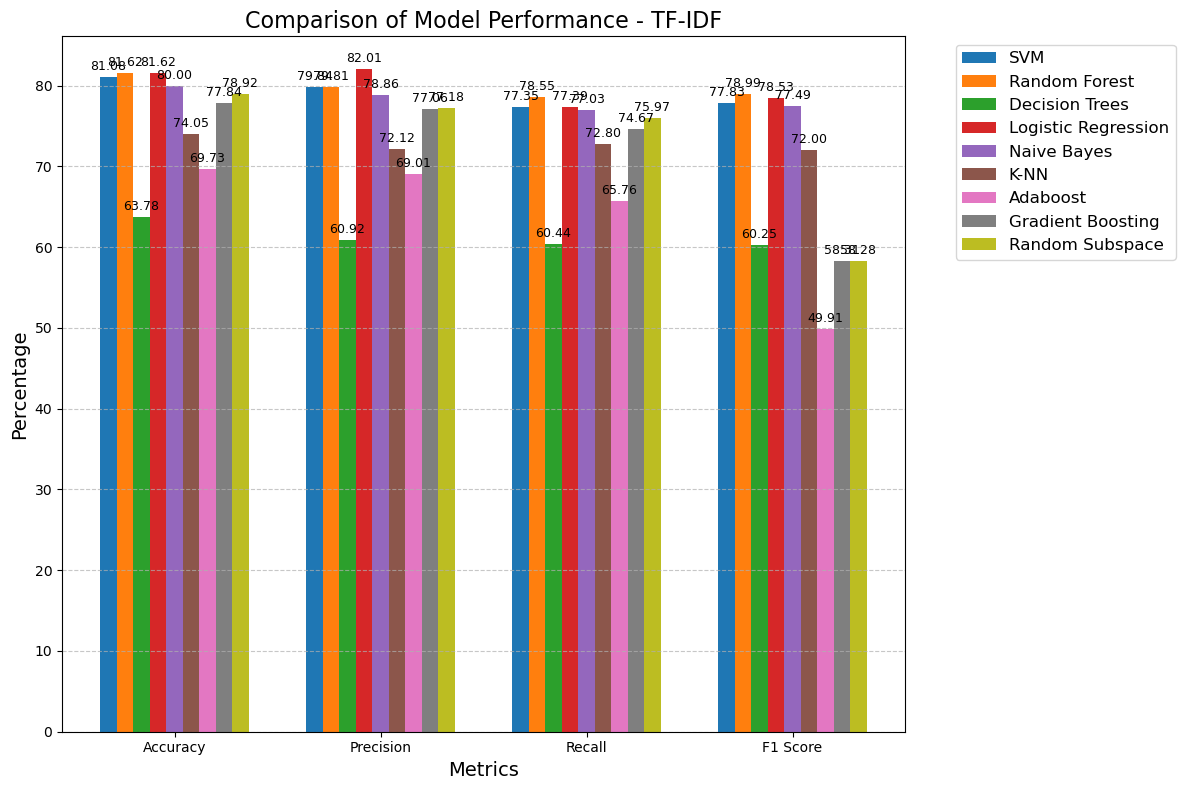

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_ = [accuracy_svm_tfidf * 100, precision_svm_tfidf * 100, recall_svm_tfidf * 100, f1_svm_tfidf * 100]
rf_ = [accuracy_rf_tfidf * 100, precision_rf_tfidf * 100, recall_rf_tfidf * 100, f1_rf_tfidf * 100]
dt_ = [accuracy_dt_tfidf * 100, precision_dt_tfidf * 100, recall_dt_tfidf * 100, f1_dt_tfidf * 100]
lr_ = [accuracy_lr_tfidf * 100, precision_lr_tfidf * 100, recall_lr_tfidf * 100, f1_lr_tfidf * 100]
nb_ = [accuracy_nb_tfidf * 100, precision_nb_tfidf * 100, recall_nb_tfidf * 100, f1_nb_tfidf * 100]
knn_ = [accuracy_knn_tfidf * 100, precision_knn_tfidf * 100, recall_knn_tfidf * 100, f1_knn_tfidf * 100]
adaboost_ = [accuracy_adaboost_tfidf * 100, precision_adaboost_tfidf * 100, recall_adaboost_tfidf * 100, f1_adaboost_glo * 100]
gb_ = [accuracy_gb_tfidf * 100, precision_gb_tfidf * 100, recall_gb_tfidf * 100, f1_gb_glo * 100]
rs_ = [accuracy_rs_tfidf * 100, precision_rs_tfidf * 100, recall_rs_tfidf * 100, f1_rs_glo * 100]

# Bar width and positions
X_axis = np.arange(len(X))
bar_width = 0.08
bar_positions = np.arange(len(X))

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Plotting
plt.figure(figsize=(12, 8))
models = ['SVM', 'Random Forest', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'K-NN', 'Adaboost', 'Gradient Boosting', 'Random Subspace']
for i, (model, values, color) in enumerate(zip(models, [svm_, rf_, dt_, lr_, nb_, knn_, adaboost_, gb_, rs_], colors)):
    plt.bar(bar_positions + i * bar_width, values, bar_width, label=model, color=color)
    for x, y in zip(bar_positions + i * bar_width, values):
        plt.text(x, y + 0.5, '{:.2f}'.format(y), ha='center', va='bottom', fontsize=9)

plt.xticks(bar_positions + bar_width * (len(models) - 1) / 2, X)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.title("Comparison of Model Performance - TF-IDF", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


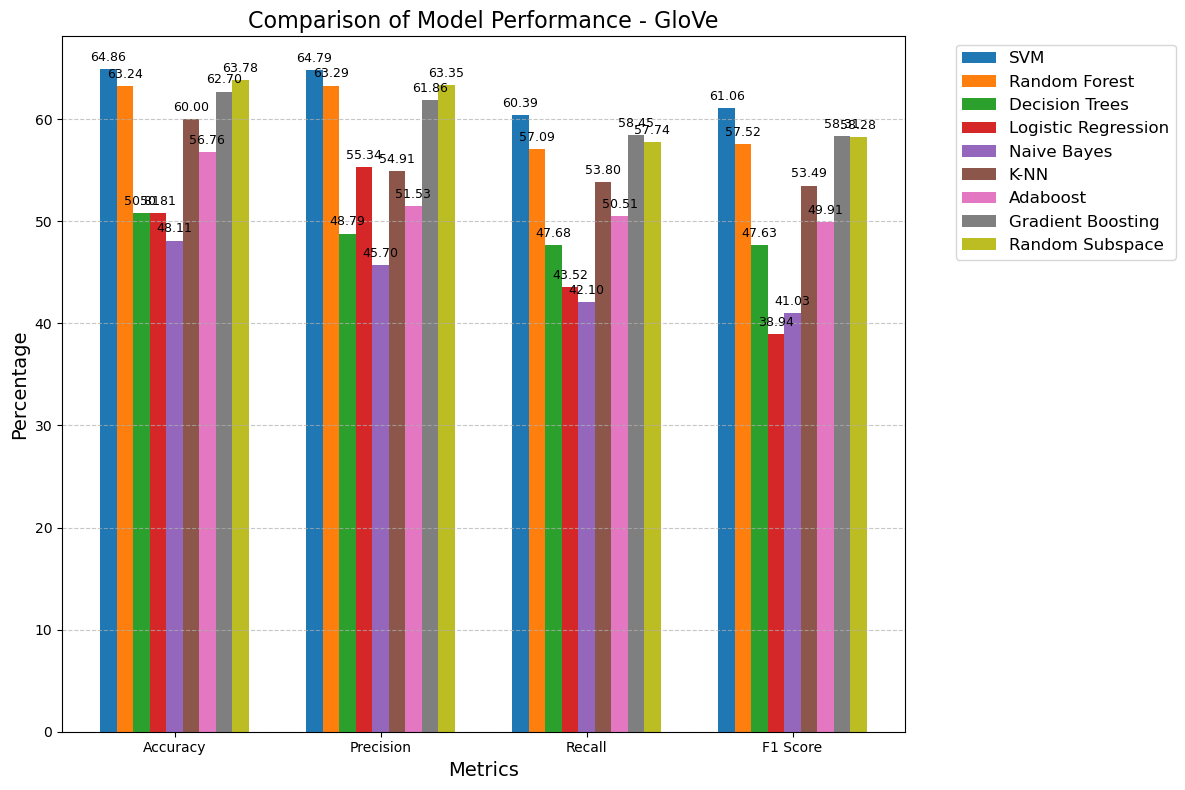

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Data
X = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
svm_ = [accuracy_svm_glo * 100, precision_svm_glo * 100, recall_svm_glo * 100, f1_svm_glo * 100]
rf_ = [accuracy_rf_glo * 100, precision_rf_glo * 100, recall_rf_glo * 100, f1_rf_glo * 100]
dt_ = [accuracy_dt_glo * 100, precision_dt_glo * 100, recall_dt_glo * 100, f1_dt_glo * 100]
lr_ = [accuracy_lr_glo * 100, precision_lr_glo * 100, recall_lr_glo * 100, f1_lr_glo * 100]
nb_ = [accuracy_nb_glo * 100, precision_nb_glo * 100, recall_nb_glo * 100, f1_nb_glo * 100]
knn_ = [accuracy_knn_glo * 100, precision_knn_glo * 100, recall_knn_glo * 100, f1_knn_glo * 100]
adaboost_ = [accuracy_adaboost_glo * 100, precision_adaboost_glo * 100, recall_adaboost_glo * 100, f1_adaboost_glo * 100]
gb_ = [accuracy_gb_glo * 100, precision_gb_glo * 100, recall_gb_glo * 100, f1_gb_glo * 100]
rs_ = [accuracy_rs_glo * 100, precision_rs_glo * 100, recall_rs_glo * 100, f1_rs_glo * 100]

# Bar width and positions
X_axis = np.arange(len(X))
bar_width = 0.08
bar_positions = np.arange(len(X))

# Colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Plotting
plt.figure(figsize=(12, 8))
models = ['SVM', 'Random Forest', 'Decision Trees', 'Logistic Regression', 'Naive Bayes', 'K-NN', 'Adaboost', 'Gradient Boosting', 'Random Subspace']
for i, (model, values, color) in enumerate(zip(models, [svm_, rf_, dt_, lr_, nb_, knn_, adaboost_, gb_, rs_], colors)):
    plt.bar(bar_positions + i * bar_width, values, bar_width, label=model, color=color)
    for x, y in zip(bar_positions + i * bar_width, values):
        plt.text(x, y + 0.5, '{:.2f}'.format(y), ha='center', va='bottom', fontsize=9)

plt.xticks(bar_positions + bar_width * (len(models) - 1) / 2, X)
plt.xlabel("Metrics", fontsize=14)
plt.ylabel("Percentage", fontsize=14)
plt.title("Comparison of Model Performance - GloVe", fontsize=16)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
